In [3]:
import numpy as np
from matplotlib.path import Path
import matplotlib.pyplot as plt
import math

In [176]:
# Define the arena using the upper-case parameters below

# The origin of the arena, (0,0) is in the lower left corner 
# All parametersare in meters 

RESOLUTION = 0.03

# Those were given but not correct
W = 4.25
H = 3.2

# Location of the docking station
BASE = [(3.63,1.55), (4.05,1.55), (3.63,1.25), (4.05,1.25)]

HIGHWAYS = {
    "top1" : [],
    "top2" : []  
}

# Each obstacle is represented by its vertices (x,y)
OBSTACLES = {
	"triangle_low_left" : [(-0.1,0), (0.6,0), (-0.1,0.7)],
	"triangle_up_right" : [(3.8,3.4), (4.25,3.4), (4.25,2.9)],
	"triangle_center" : [(1.1,1), (1.9,1), (1.475,1.65)],
	"long_rectangle" : [(1.05,2.45),(3.2,2.45),(3.2,2.29),(1.05,2.29)],
	"low_right_square" : [(3.2,1.05), (4.25,1.05), (4.25,0), (3.2,0)]
}

WALLS = {
	"bottom" : ((0,0),(W,0)),
	"right" : ((W,0), (W,H)),
	"top" : ((W,H), (0,H)),
	"left" : ((0,H), (0,0))
}


###########################################################

# Let's begin with generating the arena

# Here we accomplish two tasks
# 1) Scale to resolution
# 2) Invert the y-axis (technically moving the origin to top left)
dimensions = (int(H/RESOLUTION),int(W/RESOLUTION))
for polygon in OBSTACLES:
    for i, xy in enumerate(OBSTACLES[polygon]):
        OBSTACLES[polygon][i] = (math.ceil(xy[0]/RESOLUTION),math.ceil((H-xy[1])/RESOLUTION)) # here, also invert 
for i, xy in enumerate(BASE):
    BASE[i] = (int(xy[0]/RESOLUTION),int((H-xy[1])/RESOLUTION))



# Generate an array of [x,y] coordinates for all squares on the arena
x = np.indices(dimensions)[1].flatten()
y = np.indices(dimensions)[0].flatten()
all_indices = np.vstack((x,y)).T

# Initialize long arena array with all False
arena = np.zeros((1, len(all_indices)), dtype=bool)

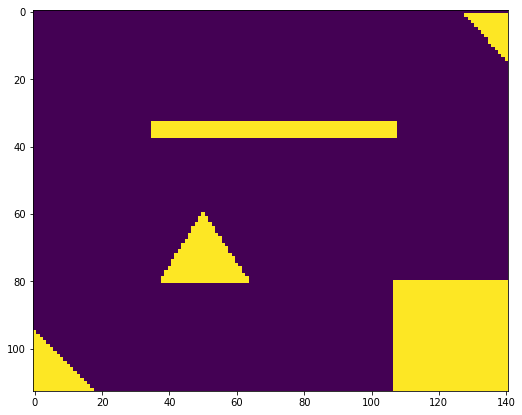

In [164]:
# mask obstacles
for polygon in OBSTACLES:
        # initializes a path with the given vertices
        p = Path(OBSTACLES[polygon]) 
        # marks with True the coordinates of the squares surrounded by the path 'p'
        mask = p.contains_points(all_indices)
        # invert mask
        arena = np.not_equal(arena, mask)
    
# find distances from any point to the nearest wall in a straight line, give an angle theta


# Reshape
arena = arena.reshape(dimensions)

# Plot map
plt.rcParams["figure.figsize"] = (20,7)
plt.imshow(arena)
plt.show()
        